In [11]:
import pandas as pd
df = pd.read_csv('sample_data/california_housing_test.csv')


In [12]:
import seaborn as sns

In [14]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


<Axes: xlabel='households', ylabel='population'>

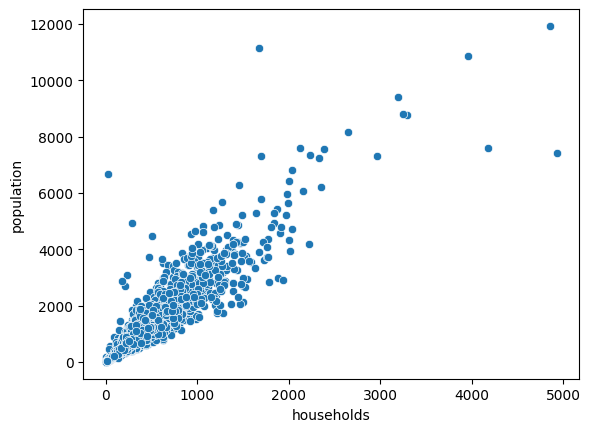

In [15]:
sns.scatterplot(data=df, x="households", y="population")

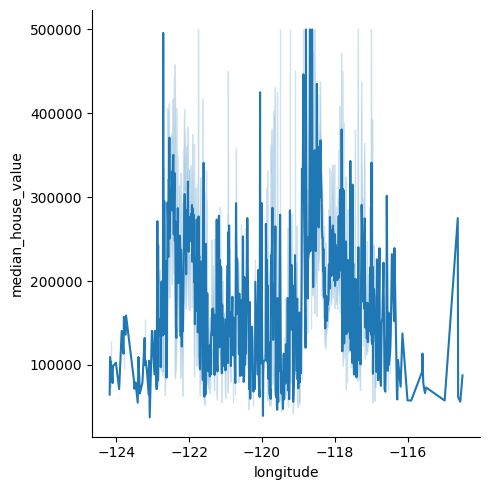

In [17]:
sns.relplot(data=df, x="longitude", y="median_house_value", kind="line")

<Axes: xlabel='housing_median_age', ylabel='Count'>

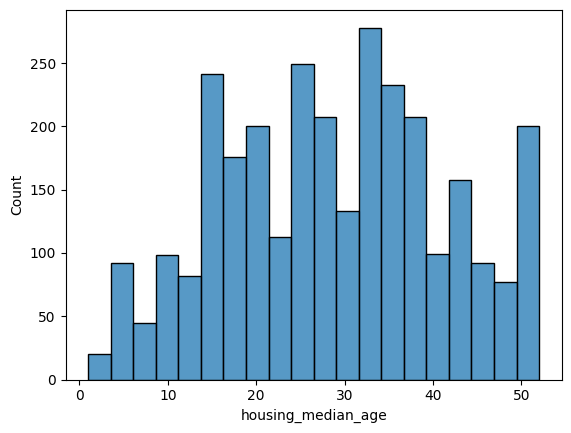

In [18]:
sns.histplot(data=df, x="housing_median_age")

<Axes: xlabel='housing_median_age', ylabel='Count'>

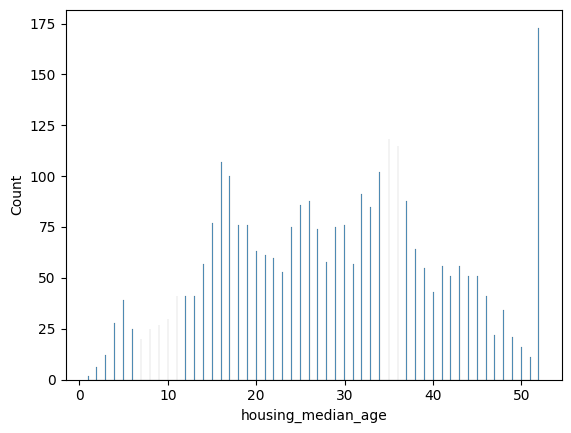

In [20]:
sns.histplot(data=df, x="housing_median_age", bins=500)

<Axes: xlabel='median_house_value', ylabel='Count'>

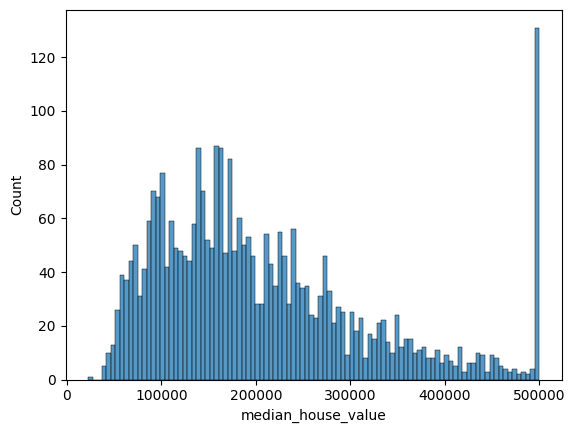

In [22]:
sns.histplot(data=df, x="median_house_value", bins=100)

In [ ]:
sns.histplot(data=df, x="median_house_value", bins=20, hue = "housing_median_age")

In [25]:
df.loc[df["housing_median_age"]>30, "age"] = "old"

In [30]:
df.loc[ (df["housing_median_age"]<=30) & (df["housing_median_age"]>=15), "age"] = "medium"

In [31]:
df.loc[df["housing_median_age"]<15, "age"] = "young"

In [32]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,age
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0,medium
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0,old
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0,medium
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0,medium
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0,medium


<Axes: xlabel='median_house_value', ylabel='Count'>

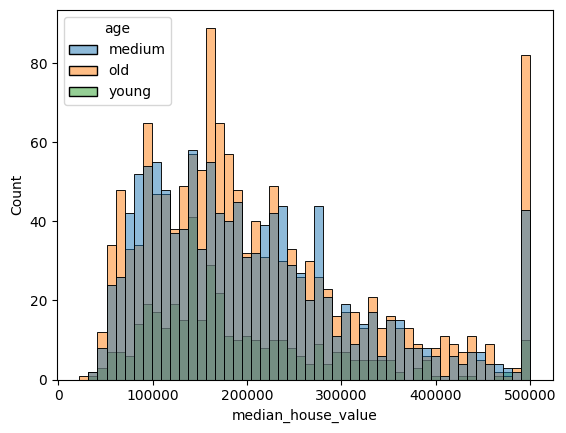

In [36]:
sns.histplot(data=df, x="median_house_value", bins=50, hue = "age")

In [45]:
new_df = df[df["median_house_value"] >500000]

In [46]:
new_df.count()

longitude             125
latitude              125
housing_median_age    125
total_rooms           125
total_bedrooms        125
population            125
households            125
median_income         125
median_house_value    125
age                   125
dtype: int64

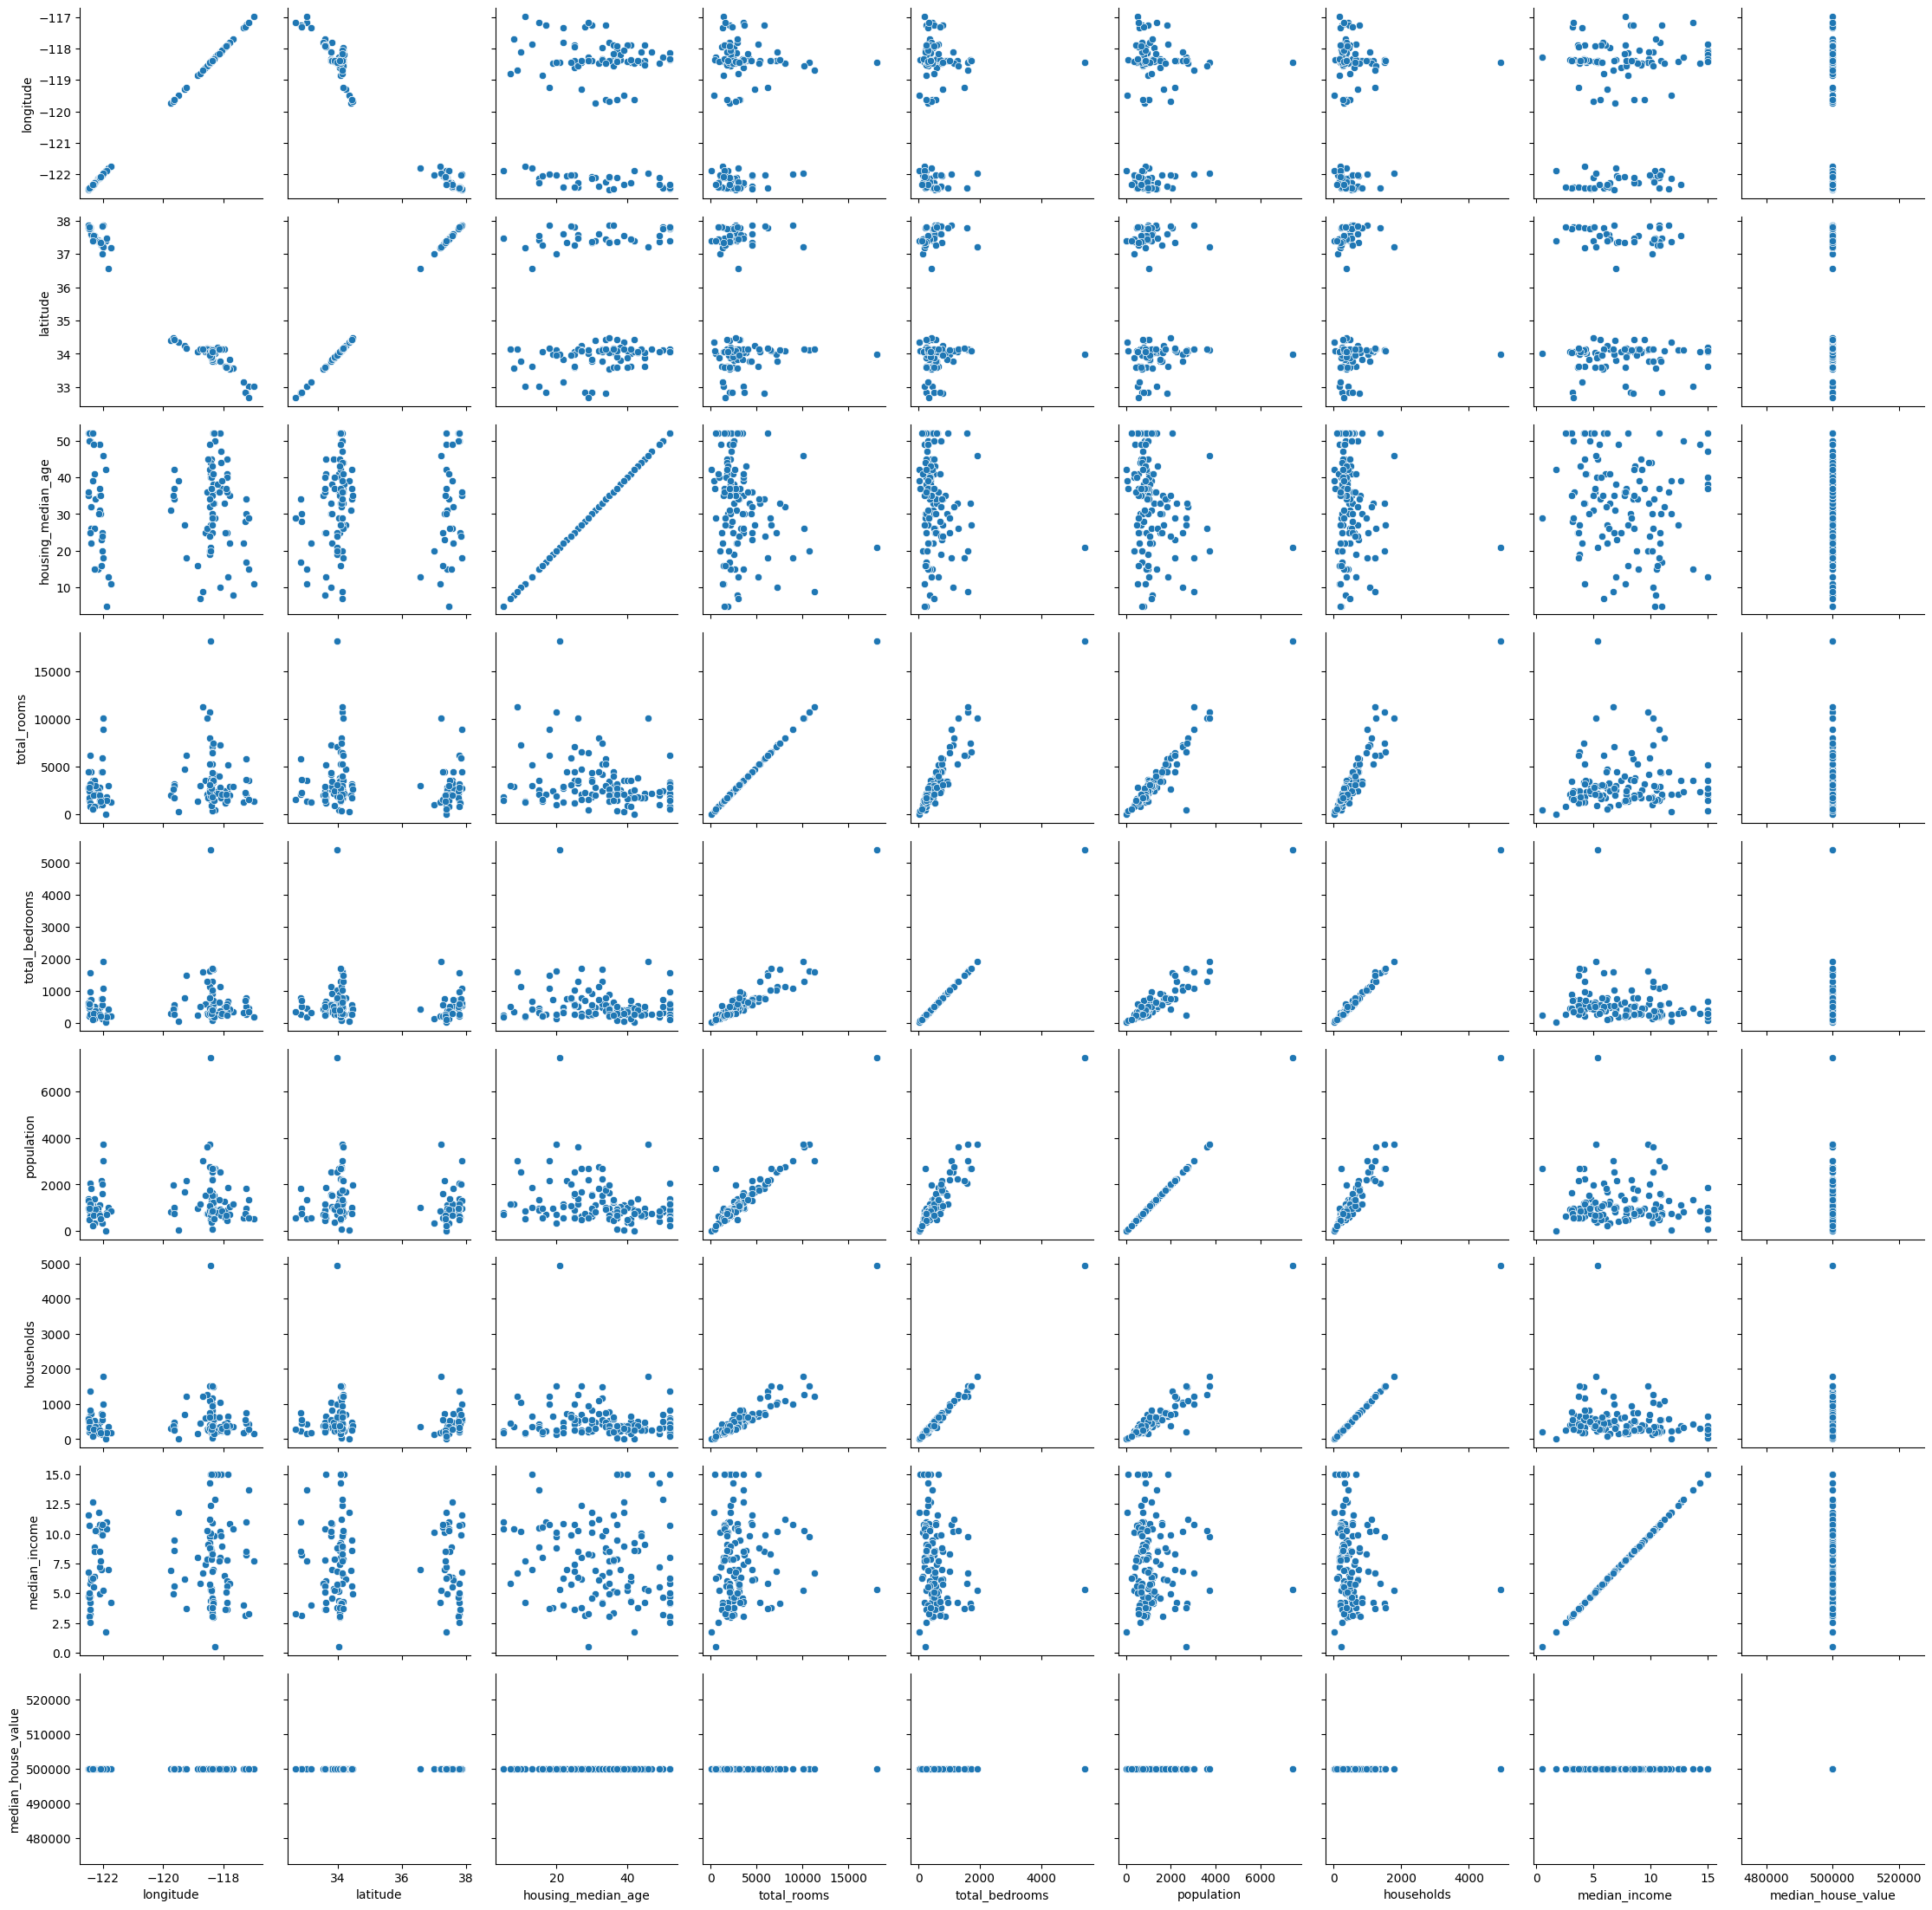

In [47]:
g = sns.PairGrid(new_df)
g.map(sns.scatterplot)

<Axes: xlabel='latitude', ylabel='longitude'>

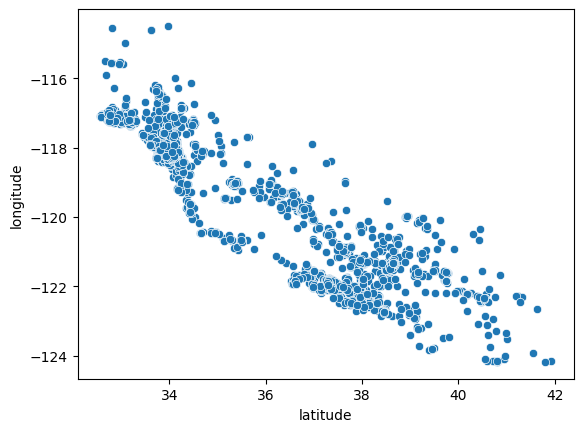

In [50]:
sns.scatterplot(data=df, x = "latitude", y = "longitude")

In [51]:
df.loc[df["median_house_value"]>500000, "cost_group"] = "expensive"
df.loc[df["median_house_value"]<=500000, "cost_group"] = "rest"

<Axes: xlabel='latitude', ylabel='longitude'>

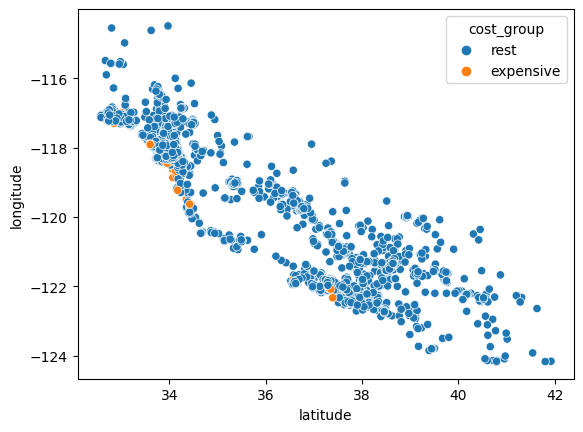

In [52]:
sns.scatterplot(data=df, x = "latitude", y = "longitude", hue = "cost_group")

In [53]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
import folium

In [55]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,age,cost_group
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0,medium,rest
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0,old,rest
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0,medium,rest
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0,medium,rest
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0,medium,rest


In [56]:
new_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,age
42,-118.06,34.15,37.0,1980.0,226.0,697.0,226.0,15.0001,500001.0,old
117,-122.07,37.34,30.0,1851.0,238.0,631.0,236.0,10.1007,500001.0,medium
118,-117.18,33.02,15.0,3540.0,453.0,1364.0,425.0,13.6623,500001.0,medium
128,-122.47,37.79,52.0,2844.0,623.0,1380.0,596.0,4.7500,500001.0,old
135,-122.34,37.56,39.0,3562.0,391.0,1139.0,391.0,12.6417,500001.0,old


In [57]:
new_df.count()

longitude             125
latitude              125
housing_median_age    125
total_rooms           125
total_bedrooms        125
population            125
households            125
median_income         125
median_house_value    125
age                   125
dtype: int64

In [59]:
geo = list(zip(new_df["longitude"], new_df["latitude"]))

In [61]:
mapiit = folium.Map(zoom_start=13)
for coor in geo:
  folium.Marker(location = [coord[1], coord[0]], fill_color = "#43d9de", radius = 8).add_to(mapiit)
mapiit

NameError: ignored